# Multilayer Perceptron


In [32]:
import numpy as np
import matplotlib.pyplot as plt

Multilayer Perceptron is a type of artificial neural network that consists of multiple layers of interconnected nodes, called neurons. It is a feedforward neural network, meaning that the information flows in one direction, from the input layer to the output layer.

MLP is widely used in various machine learning tasks, such as classification, regression, and pattern recognition. It is known for its ability to learn complex patterns and make accurate predictions.


In [33]:
# Plot the decision boundary of a classifier
# Not really important for the course
def plotgrid(f, dr=0):
    result = np.zeros((100, 100))
    for i in range(100):
        for j in range(100):
            x = np.array([i/100.0, j/100.0])
            z = f(x)
            if dr == 0:
                z /= sum(z)
                result[i, j] = z[1]
            else:
                result[i, j] = np.argmax(z)
    return result.T[::-1]

In [34]:
def random_data():
    data = np.random.random_sample((100, 2))
    labels = (data[:, 0]-data[:, 1] < 0)

    d0 = data[labels == False]
    d1 = data[labels]

    targets = np.array([labels, 1-labels]).T
    return data, targets, labels, d0, d1

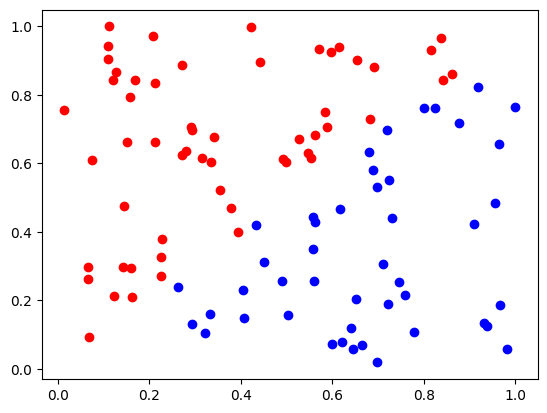

In [35]:
data, targets, labels, d0, d1 = random_data()
plt.plot(d0[:, 0], d0[:, 1], "bo")
plt.plot(d1[:, 0], d1[:, 1], "ro")

## Fully Connected Feed-Forward Network

In [36]:
class Fully:
    def __init__(self, neurons, input_length):
        self.weights = np.random.random((neurons, input_length))

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input)

    def backward(self, back, lr):
        x = np.outer(back, self.input)
        old_weights = self.weights
        self.weights -= lr * x
        return np.dot(old_weights.T, back)


class Sigmoid:
    def forward(self, input):
        self.result = 1/(1+np.exp(-input))
        return self.result

    def backward(self, back, _):
        return back * self.result*(1-self.result)


class Network:
    def __init__(self, input_length, output_length, lr):
        self.lr = lr
        self.net = [
            Fully(5, input_length),
            Sigmoid(),
            Fully(output_length, 5),
            Sigmoid()
        ]

    def forward(self, x):
        for layer in self.net:
            x = layer.forward(x)
        return x

    def backward(self, y):
        for layer in reversed(self.net):
            y = layer.backward(y, self.lr)

network = Network(input_length=2, output_length=2, lr=1)

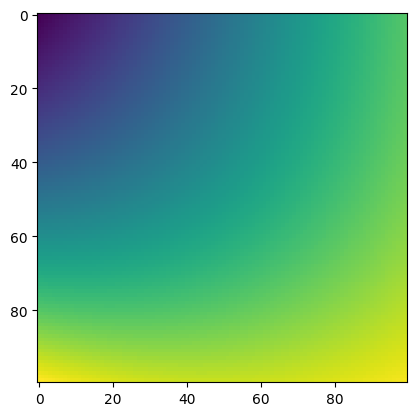

In [37]:
# Before training, the decision boundary is fuzzy and random
plt.imshow(plotgrid(network.forward, dr=0))

In [38]:
for e in range(1000):
    i = np.random.randint(0, len(data))
    out = network.forward(data[i])
    network.backward(-(targets[i]-out))
total = len(data)
good = 0
for i in range(len(data)):
    out = np.argmax(network.forward(data[i]))
    if out == np.argmax(targets[i]):
        good += 1

print("Correct predicted: ", 1.0*good/total)
plt.imshow(plotgrid(network.forward, dr=0))

NameError: name 'lr' is not defined